# Importing libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing data

In [2]:
# Create a path to import data sets

path = r'C:\Users\srira\OneDrive\Documents\Instacart Basket Analysis'

In [4]:
# Importing data file merged_opd.pkl

opd_merged = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'merged_opd.pkl'))

In [5]:
opd_merged.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,income,Region,Activity flag,department,_merge,Age_group,Income_group,Dependants_group,profile_flag,customer_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,40423,South,Normal activity,beverages,both,30 - 39 years old,lower income,has dependants,married young adult with dependants,low income married young adult with dependants
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,40423,South,Normal activity,beverages,both,30 - 39 years old,lower income,has dependants,married young adult with dependants,low income married young adult with dependants
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,40423,South,Normal activity,beverages,both,30 - 39 years old,lower income,has dependants,married young adult with dependants,low income married young adult with dependants
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,40423,South,Normal activity,beverages,both,30 - 39 years old,lower income,has dependants,married young adult with dependants,low income married young adult with dependants
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,40423,South,Normal activity,beverages,both,30 - 39 years old,lower income,has dependants,married young adult with dependants,low income married young adult with dependants


In [6]:
opd_merged.shape

(30964564, 39)

# Creating visualizations 

# Departments that have the highest frequency of product orders

Text(0.5, 0, 'Total number of orders')

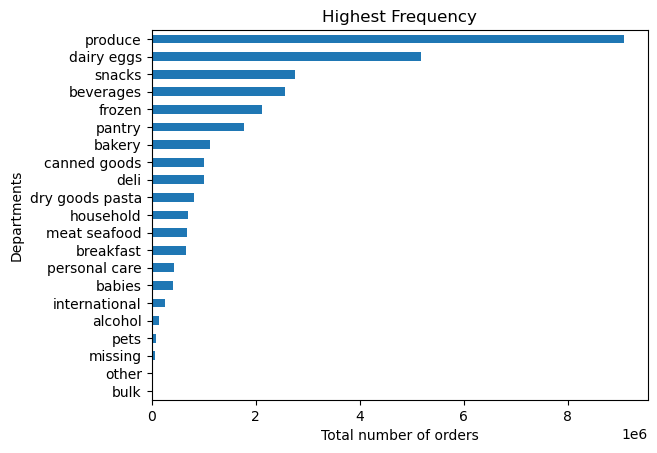

In [96]:
# Bar chart to determine the highest frequency

dept_freq = opd_merged['department'].value_counts().sort_values(ascending = True).plot.barh()
# Titles and labels
plt.title('Highest Frequency')
plt.ylabel('Departments')
plt.xlabel('Total number of orders')

In [97]:
# Exporting the bar chart

dept_freq.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'highest_frequency.png'))

# Distribution among users in regard to the brand loyalty

In [13]:
# Displays the count of the column 'loyalty_flag'

opd_merged['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular Customer    15876776
Loyal Customer      10284093
New Customer         4803695
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

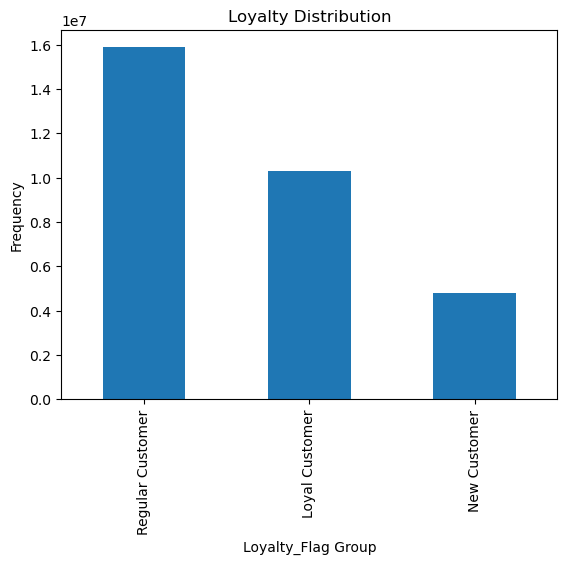

In [101]:
# Create a bar chart to determine the distribution among users

user_dist = opd_merged['loyalty_flag'].value_counts().plot.bar()
# Titles and labels
plt.title('Loyalty Distribution')
plt.xlabel('Loyalty_Flag Group')
plt.ylabel('Frequency')

In [102]:
# Exporting the bar chart

user_dist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_groups.png'))

# Differences in ordering habits based on the customers region

In [19]:
# Displays the counts of the column 'Region'

opd_merged['Region'].value_counts(dropna = False)

Region
South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: count, dtype: int64

In [20]:
# Groupby customers loyalty flag and region

ordering_region = opd_merged.groupby(['loyalty_flag', 'Region']).size().unstack()

Text(0, 0.5, 'Region')

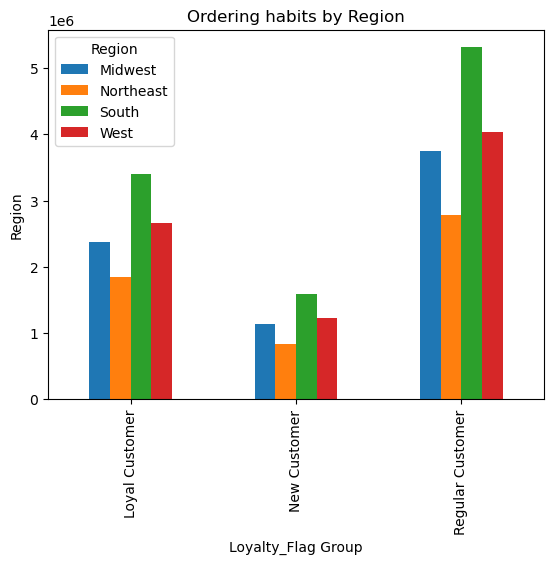

In [104]:
# Create a bar chart to determine the ordering habits

ordering_region_bar = ordering_region.plot.bar()
# Titles and labels
plt.title('Ordering habits by Region')
plt.xlabel('Loyalty_Flag Group')
plt.ylabel('Region')

In [24]:
# Checking the output

ordering_region

Region,Midwest,Northeast,South,West
loyalty_flag,,,,
Loyal Customer,2373774,1841785,3405844,2662690
New Customer,1136761,842156,1593664,1231114
Regular Customer,3750978,2780744,5311631,4033423


In [29]:
# Exporting the bar chart

ordering_region_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Ordering_habits_by_Region.png'))

# Determining the ordering habits interms of Age groups, Family status, Income and Region, Price range and Frequency of customers by Department

# Department by Age group

In [43]:
# Groupby customers age groups and department

age_dept = opd_merged.groupby(['department', 'Age_group']).size().unstack()

In [82]:
# Sorts the bar chart
age_dept = age_dept.loc[age_dept.sum(axis=1).sort_values(ascending=True).index]

Text(0.5, 0, 'Frequency of age groups')

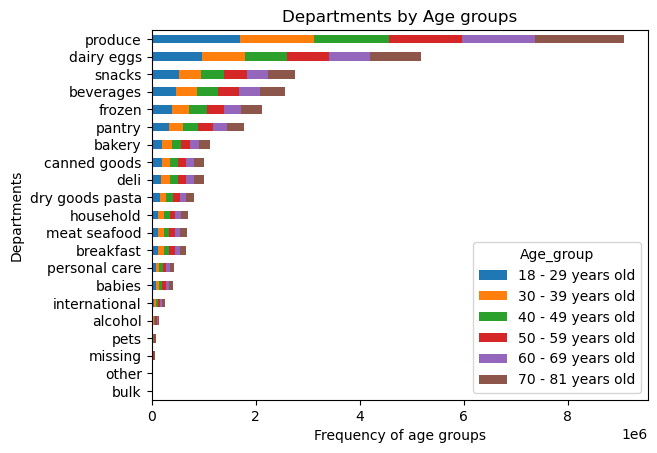

In [105]:
# Create a bar chart to determine the ordering habits with regards to age group and department

age_dept_bar = age_dept.plot.barh(stacked = True)
# Titles and labels
plt.title('Departments by Age groups')
plt.ylabel('Departments')
plt.xlabel('Frequency of age groups')

# Department by Family_status

In [48]:
# Groupby customers family_status and department

fam_dept = opd_merged.groupby(['department', 'Family_Status']).size().unstack()

In [80]:
# Sorts the bar chart
fam_dept = fam_dept.loc[fam_dept.sum(axis=1).sort_values(ascending=True).index]

Text(0.5, 0, 'Family Status')

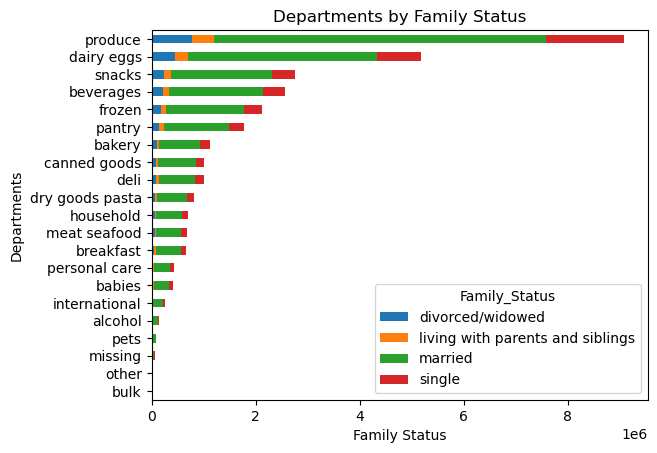

In [106]:
# Create a bar chart to determine the ordering habits with regards to family ststus and department

fam_dept_bar = fam_dept.plot.barh(stacked = True)
# Titles and labels
plt.title('Departments by Family Status')
plt.ylabel('Departments')
plt.xlabel('Family Status')

# Department by Income_groups

In [54]:
# Groupby customers income and department

inc_dept = opd_merged.groupby(['department', 'Income_group']).size().unstack()

In [78]:
# Sorts the bar chart
inc_dept = inc_dept.loc[inc_dept.sum(axis=1).sort_values(ascending=True).index]

Text(0.5, 0, 'Income')

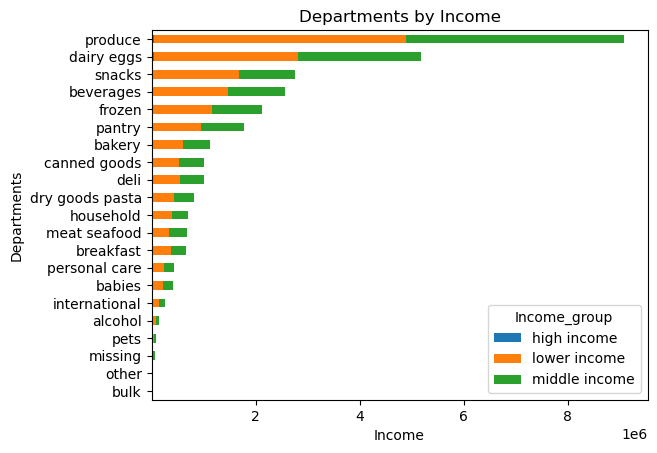

In [107]:
# Create a bar chart to determine the ordering habits with regards to income group and department

inc_dept_bar = inc_dept.plot.barh(stacked = True)
# Titles and labels
plt.title('Departments by Income')
plt.ylabel('Departments')
plt.xlabel('Income')

# Department by Region

In [57]:
# Groupby customers income and department

reg_dept = opd_merged.groupby(['department', 'Region']).size().unstack()

In [73]:
# Sorts the bar chart
reg_dept = reg_dept.loc[reg_dept.sum(axis=1).sort_values(ascending=True).index]

Text(0.5, 0, 'Region')

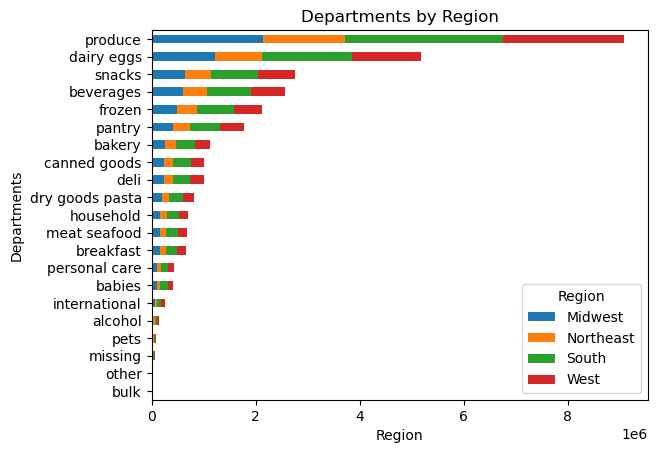

In [108]:
# Create a bar chart to determine the ordering habits with regards to region and department

reg_dept_bar = reg_dept.plot.barh(stacked = True)
# Titles and labels
plt.title('Departments by Region')
plt.ylabel('Departments')
plt.xlabel('Region')

# Customer profile by Price_range

In [66]:
# Groupby products price range and customer profile

price_dept = opd_merged.groupby(['customer_profile', 'price_range_loc']).size().unstack()

In [70]:
# Sorts the bar chart
price_dept = price_dept.loc[price_dept.sum(axis=1).sort_values(ascending=True).index]

Text(0.5, 0, 'Price Range')

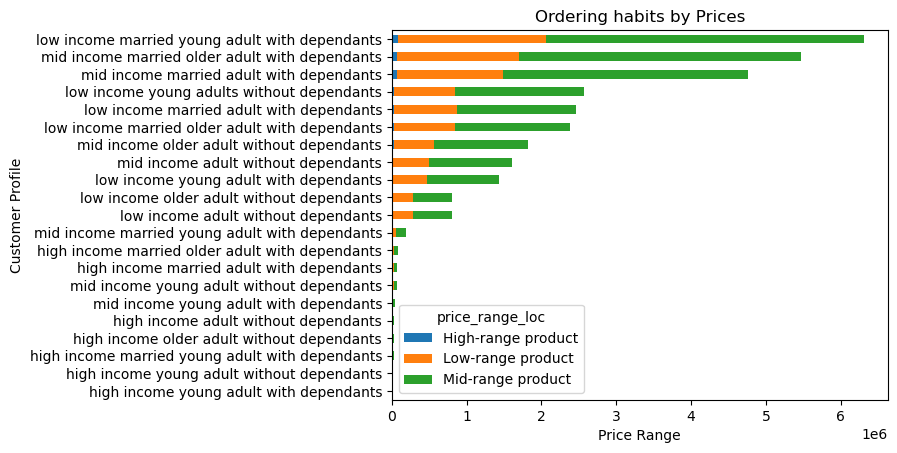

In [109]:
# Create a bar chart to determine the ordering habits with regards to price range and customer profile

price_dept_bar = price_dept.plot.barh(stacked = True)
# Titles and labels
plt.title('Ordering habits by Prices')
plt.ylabel('Customer Profile')
plt.xlabel('Price Range')

# Customer Profile by frequency flag

In [75]:
# Groupby frequency flag and customer profile

freq_cust = opd_merged.groupby(['customer_profile', 'frequency_flag']).size().unstack()

In [76]:
# Sorts the bar chart
freq_cust = freq_cust.loc[freq_cust.sum(axis=1).sort_values(ascending=True).index]

Text(0.5, 0, 'Frequency_flag')

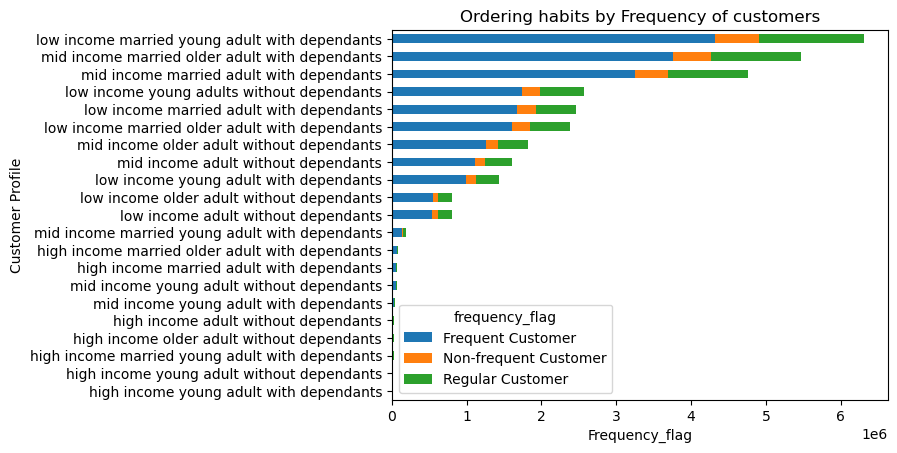

In [110]:
# Create a bar chart to determine the ordering habits with regards to customer profile and frequency flag

freq_cust_bar = freq_cust.plot.barh(stacked = True)
# Titles and labels
plt.title('Ordering habits by Frequency of customers')
plt.ylabel('Customer Profile')
plt.xlabel('Frequency_flag')

# Exporting the bar charts

In [111]:
# Exporting bar chart Department by age group
age_dept_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_dept.png'))

In [112]:
# Exporting bar chart Department by family status
fam_dept_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'fam_dept.png'))

In [113]:
# Exporting bar chart Department by income
inc_dept_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'inc_dept.png'))

In [114]:
# Exporting bar chart Department by region
reg_dept_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'reg_dept.png'))

In [115]:
# Exporting bar chart Ordering habits by prices
price_dept_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'cust_prices.png'))

In [116]:
# Exporting bar chart Ordering habits by frequency of customers
freq_cust_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'freq_cust.png'))